<a href="https://colab.research.google.com/github/diyosukma/CP68-SistemRekomendasi/blob/main/Rekomendasi_Ekstrakurikuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Capstone Project Team 68 - Rekomendasi Ekstrakurikuler

## Tema Proyek - Resource Sharing

## Business Understanding
Aplikasi ini dibuat untuk membantu para siswa SMA dalam menentukan kegiatan ekstrakurikuler. Sistem rekomendasi dimodelkan dengan metode Content-based Filtering, berdasarkan pengalaman-pengalaman para siswa SMA yang dulu pernah atau sekarang sedang mengikuti ekstrakurikuler. Sistem ini dibuat berdasarkan beberapa faktor yang berpengaruh.

### Latar Belakang
Peraturan [Permendikbud nomor 62 tahun 2014](https://jdih.kemdikbud.go.id/arsip/Permendikbud%20Nomor%2062%20Tahun%202014.pdf) tentang kegiatan ekstrakurikuler, menyebutkan bahwa setiap peserta didik memiliki hak mengikuti kegiatan ekstrakurikuler sesuai dengan minat dan bakat mereka. Penentuan pemilihan ekstrakurikuler berdasarkan minat dan bakat terjadi di Sekolah Menengah Atas (SMA) diserahkan sepenuhnya pada siswa. Menurut [Sari dan Simanjuntak (2020)](http://ejournal.upbatam.ac.id/index.php/comasiejournal/article/view/2141/1249) terkadang siswa cenderung bingung memilih ekstrakurikuler dikarenakan orang tua yang tidak suka dengan hobi anaknya atau siswa tersebut menganggap bahwa dirinya tidak sungguh-sungguh dengan hobi dan bakatnya. Maka dari itu dibangun sistem rekomendasi ekstrakurikuler pada siswa SMA dengan harapan membantu para siswa memilih ekstrakurikuler yang sesuai dengan mereka.

### Problem Statement
Bagaimana cara menentukan ekstrakurikuler yang sesuai dengan minat dan keadaan siswa SMA?

### Research Questions
1. Bagaimana cara membuat sistem rekomendasi ekstrakurikuler untuk anak SMA yang baik dan benar?
2. Apakah Metode Content-Based Filtering cocok digunakan untuk membuat sistem rekomendasi ekstrakurikuler ini?
3. Bagaimana hasil akurasi sistem rekomendasi yang dibuat?
4. Faktor apa yang berpengaruh dalam penentuan ekstrakurikuler siswa SMA?


## Data Understanding

Library yang dibutuhkan

In [1]:
# import os
import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
pip install rake-nltk

In [3]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Data Loading

File yang akan digunakan adalah data hasil kuesioner mengenai hubungan ekstrakurikuler dan minat/bakat.

In [76]:
df_eskul = pd.read_excel('data_ekstrakurikuler_clean.xlsx')
df_tesmb = pd.read_excel('tesminat_bakat.xlsx')

In [77]:
df_eskul

,Nama,Asal Sekolah,Sulit Memilih,Gender,Agama,Jurusan,Bidang Ekstrakurikuler,Pekerjaan Ibu,Pekerjaan Bapak,Sungguh Berkegiatan,Minat Bakat Tersalurkan,Alasan Memilih,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Minat Bakat
0,Siswa01,SMA Negeri 5 Sukabumi,Tidak,Laki-laki,Islam,IPS,Kesenian,Ibu Rumah Tangga,Wiraswasta,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
1,Siswa02,SMA Negeri 5 Sukabumi,Tidak,Laki-laki,Islam,IPS,Olahraga,Ibu Rumah Tangga,Wiraswasta,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
2,Siswa03,SMA Negeri 1 Kota Sukabumi,Tidak,Perempuan,Islam,IPA,Akademik & Kebahasaan,Ibu rumah tangga,PNS,Ya,Ya,Tekad dari diri sendiri,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
3,Siswa04,SMAN 1CIBADAK,Tidak,Perempuan,Islam,IPA,Olahraga,PNS,PNS,Ya,Ya,Tekad dari diri sendiri,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
4,Siswa05,SMAN 1CIBADAK,Tidak,Perempuan,Islam,IPA,Kesenian,PNS,PNS,Ya,Ya,Tekad dari diri sendiri,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Siswa289,SMA 1 Semarang,Tidak,Perempuan,Islam,IPS,Lingkungan Hidup,IRT,Sopir,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,1 Kali Seminggu,Gemar menuangkan ide dalam bentuk tulisan atau...
289,Siswa290,SMA 1 Surakarta,Ya,Laki-laki,Kristen Protestan,IPA,Akademik & Kebahasaan,IRT,Karyawan perusahaan,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
290,Siswa291,SMA 1 Surakarta,Ya,Laki-laki,Kristen Protestan,IPA,IT,IRT,Karyawan perusahaan,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
291,Siswa292,SMA 6 Jakarta,Ya,Perempuan,Kristen Katolik,IPA,Akademik & Kebahasaan,Ibu rumah tangga,Pegawai bank,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,1 Kali Seminggu,Gemar menuangkan ide dalam bentuk tulisan atau...


In [78]:
df_tesmb

,Nama Samaran,Menggemari kegiatan yang melibatkan tulisan,Gemar menuangkan ide dalam bentuk tulisan atau puisi,Senang berinteraksi melalui verbal atau bercerita,Memiliki ketertarikan dalam dunia menulis khususnya menulis sebuah cerita fiksi,Gemar berargumen,Gemar ilmu linguistik,Memiliki peliharaan baik berupa hewan ataupun tanaman,Mencintai dan gemar mempelajari segala sesuatu yang berhubungan dengan alam,Memiliki niat untuk berkunjung ke kebun binatang,Mencintai kegiatan yang berhubungan dengan pecinta alam,Menyukai kegiatan yang menenangkan misalnya kegiatan memancing,Tidak mengabaikan kelestarian alam atau lingkungan,Gemar memikirkan cita-cita yang ingin digapai,Cenderung memilih untuk melakukan berbagai hal secara individu,Cenderung menyukai bekerja hanya dengan kemampuan sendiri,Gemar mendokumentasikan pengalaman dan perasaannya dalam bentuk tulisan,Mempertimbangkan baik sisi plus ataupun minus terhadap keputusan yang akan diambil dalam menghadapi sebuah masalah diambil dalam menghadapi sebuah masalah,Memahami sisi positif maupun negatif yang ada dalam dirinya,Menyukan permainan yang memerlukan pemikiran kritis,Menyukai science,Mencintai dunia eksakta,Suka bermain komputer dan menemukan cara kerja komputer,Cenderung lebih mudah bekerja dan berpikir mengenai hal-hal yang berhubungan dengan angka,Suka pelajaran matematika,Gemar berinteraksi dengan sesama,Tidak sulit dalam beradaptasi dengan orang baru,Cenderung menyukai untuk bekerja secara berkelompok,Peduli dan ringan tangan kepada orang lain,Memiliki ide untuk membuat orang lain merasa nyaman untuk bekerja sama,Seringkali menjadi tempat berbagi cerita bagi rekannya,Menyukai dan memiliki kemampuan dalam bermain alat musik,Mencintai dunia tarik suara dan musik,Mampu dengan mudah meresapi nada atau melodi dari sebuah lagu,Mampu dengan mudah mendefinisikan lagu dan instumen dari berbagai musik dan lagu,Gemar bekerja sambil mendendangkan suatu irama lagu atau musik,Gemar merangkai kata dan menuangkannya kedalam sebuah lagu,Gemar memainkan permainan puzzle atau lego,Mencintai kegiatan fotografi,Gemar melukis,Meniru cara kerja orang lain dalam menghadapi permasalahan,Kemampuan visualisasi dalam bentuk gambar cenderung baik,Memiliki kemampuan yang baik dalam mapping wilayah,Menyukai kegiatan olah tubuh,Cenderung menggerakan anggota tubuh tertentu ketika berpikir,Sering merasa jenuh ketika diharuskan berdiam diri secara terus menerus,Menyukai dunia seni peran atau menari,Menyukai kegiatan yang dilakukan outdoor,Lebih menyukai praktik daripada teori
0,Siswa01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1
1,Siswa02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1
2,Siswa03,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Siswa04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1
4,Siswa05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Siswa289,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0
289,Siswa290,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
290,Siswa291,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
291,Siswa292,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0


### Visualisasi Data

##### Sulit Memilih
Dari data yang diperoleh, banyak siswa yang kesulitan saat memilih ekstrakurikuler. Berikut visualisasinya. 

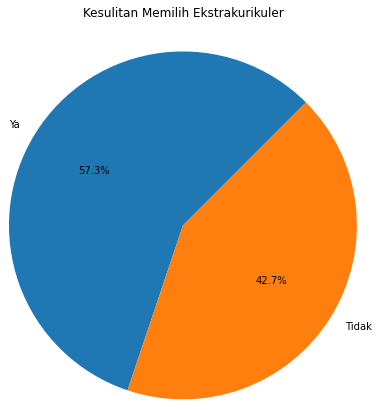

In [79]:
value_count_kesulitan = df_eskul['Sulit Memilih'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_kesulitan['Ya'], 
        value_count_kesulitan['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Kesulitan Memilih Ekstrakurikuler", pad=100)
plt.show()

#### Bidang Ekstrakurikuler
Bidang ekstrakurikuler yang paling banyak diminati.

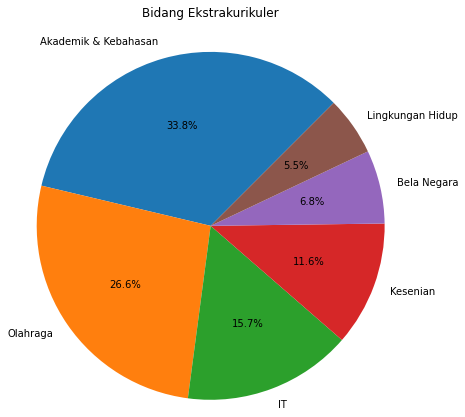

In [80]:
value_count_bidang = df_eskul['Bidang Ekstrakurikuler'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_bidang['Akademik & Kebahasaan'], 
        value_count_bidang['Olahraga'], 
        value_count_bidang['IT'],
        value_count_bidang['Kesenian'],
        value_count_bidang['Bela Negara'],
        value_count_bidang['Lingkungan Hidup']],
        labels=['Akademik & Kebahasan', 'Olahraga', 'IT', 'Kesenian', 'Bela Negara', 'Lingkungan Hidup'], 
        autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Bidang Ekstrakurikuler", pad=100)
plt.show()

#### Jurusan
Yang memilih ekstrakurikuler kebanyakan dari jurusan IPA.

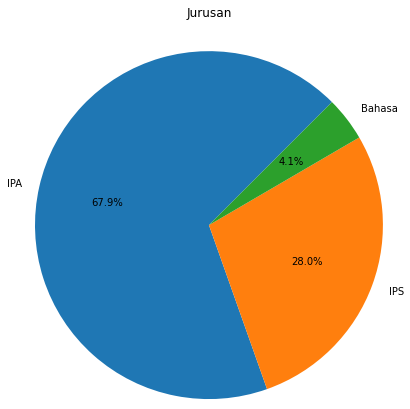

In [81]:
value_count_jurusan = df_eskul['Jurusan'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_jurusan['IPA'], 
        value_count_jurusan['IPS'],
        value_count_jurusan['Bahasa']], 
        labels=['IPA', 'IPS', 'Bahasa'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Jurusan", pad=100)
plt.show()

#### Alasan Memilih Ekstrakurikuler
Walaupun banyak yang merasa kesulitan dalam memilih ekstrakurikuler, namun banyak yang memilih ekstrakurikuler atas tekadnya sendiri diikuti dengan alasan pengaruh teman.

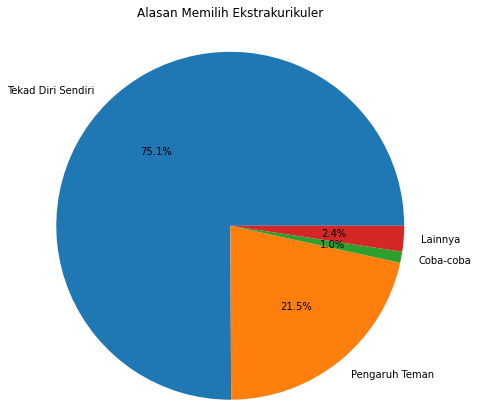

In [82]:
value_count_alasan = df_eskul['Alasan Memilih'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_alasan[0], 
        value_count_alasan[1],
        value_count_alasan[2],
        value_count_alasan[3]+value_count_alasan[4]+value_count_alasan[5]+value_count_alasan[6]+value_count_alasan[7]], 
        labels=['Tekad Diri Sendiri', 'Pengaruh Teman', 'Coba-coba', 'Lainnya'], autopct='%1.1f%%', radius=2)
ax.set_title("Alasan Memilih Ekstrakurikuler", pad=100)
plt.show()

#### Teman Berpengaruh dalam Kegiatan Ekstarkurikuler
Walau saat memilih kebanyakan karena tekad diri sendiri, namun dalam berkegiatan teman berpengaruh besar.

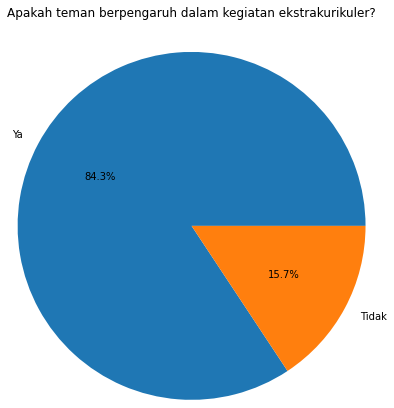

In [83]:
value_count_teman = df_eskul['Teman Berpengaruh'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_teman['Ya'], 
        value_count_teman['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', radius=2)
ax.set_title("Apakah teman berpengaruh dalam kegiatan ekstrakurikuler?", pad=100)
plt.show()

#### Gender
Kegiatan ekstrakurikuler hampir seimbang diikuti oleh perempuan dan laki-laki.

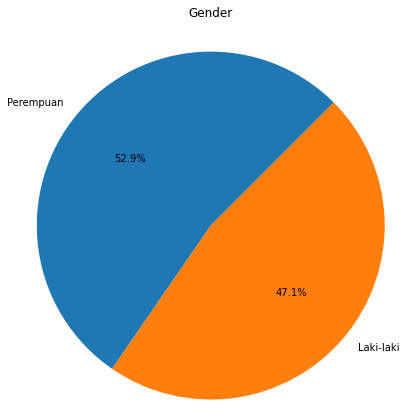

In [84]:
value_count_gender = df_eskul['Gender'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_gender[0], 
        value_count_gender[1]], 
        labels=['Perempuan', 'Laki-laki'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Gender", pad=100)
plt.show()

#### Kesungguhan dalam Ekstrakurikuler
Banyak siswa yang bersungguh-sungguh dalam mengikuti kegiatan ekstrakurikuler

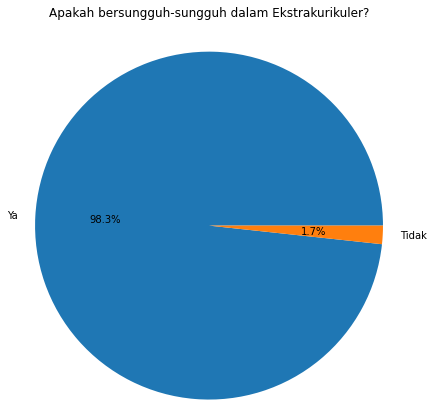

In [85]:
value_count_sungguh = df_eskul['Sungguh Berkegiatan'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_sungguh['Ya'], 
        value_count_sungguh['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', radius=2)
ax.set_title("Apakah bersungguh-sungguh dalam Ekstrakurikuler?", pad=100)
plt.show()

#### Minat Bakat Tersalurkan
Ekstrakurikuler terbukti dapat menyalurkan minat dan bakat siswa didasarkan dataset.

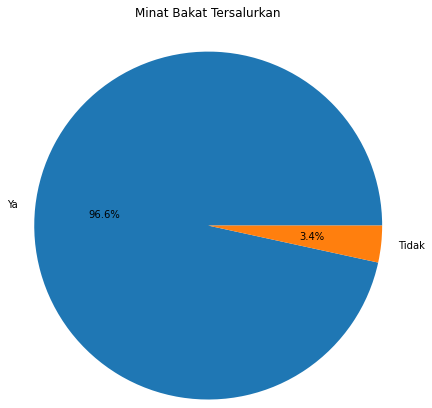

In [86]:
value_count_tersalurkan = df_eskul['Minat Bakat Tersalurkan'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_tersalurkan['Ya'], 
        value_count_tersalurkan['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', radius=2)
ax.set_title("Minat Bakat Tersalurkan", pad=100)
plt.show()

#### Minat Bakat Siswa
Minat bakat siswa yang mengikuti ekstrakurikuler

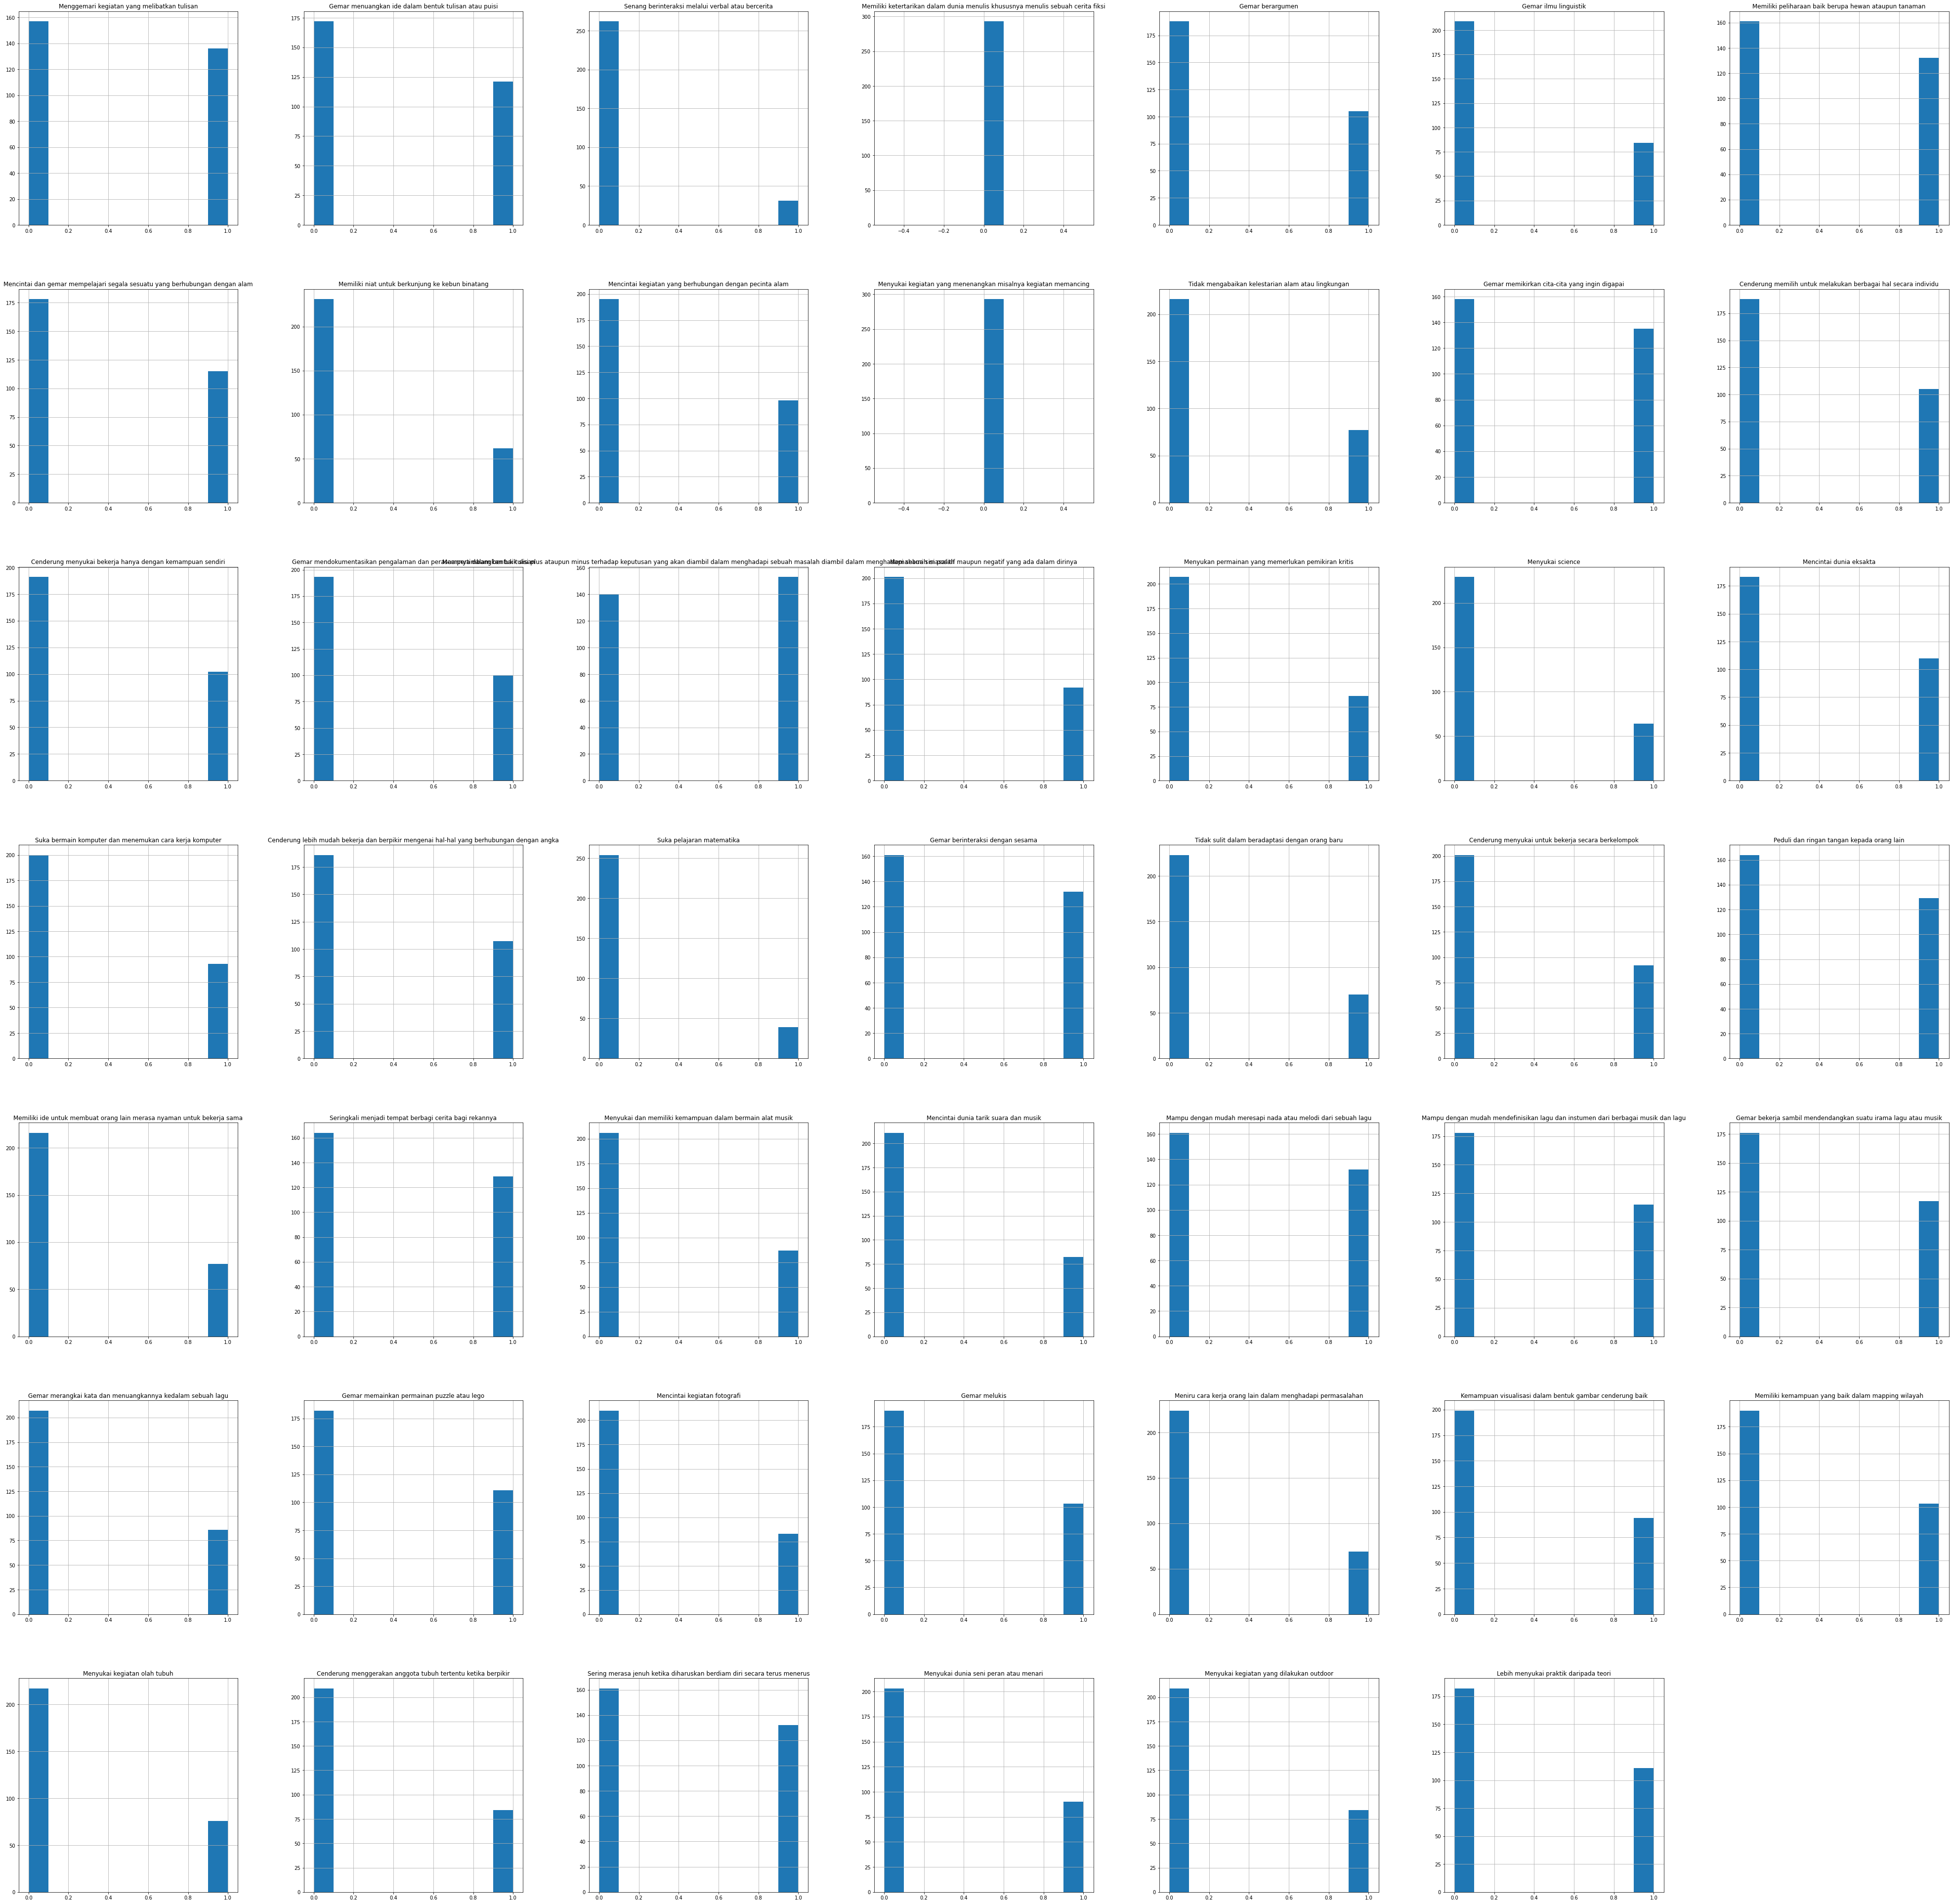

In [87]:
df_tesmb.hist(figsize=(70,70))
plt.show()

### Deskripsi Variabel

In [88]:
df_eskul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nama                     293 non-null    object
 1   Asal Sekolah             293 non-null    object
 2   Sulit Memilih            293 non-null    object
 3   Gender                   293 non-null    object
 4   Agama                    293 non-null    object
 5   Jurusan                  293 non-null    object
 6   Bidang Ekstrakurikuler   293 non-null    object
 7   Pekerjaan Ibu            293 non-null    object
 8   Pekerjaan Bapak          293 non-null    object
 9   Sungguh Berkegiatan      293 non-null    object
 10  Minat Bakat Tersalurkan  293 non-null    object
 11  Alasan Memilih           293 non-null    object
 12  Teman Berpengaruh        293 non-null    object
 13  Lama Pertemuan           293 non-null    object
 14  Banyak Pertemuan         293 non-null    o

Dari info di atas, diketahui bahwa dataset memiliki 16 fitur. Namun, hanya beberapa fitur yang akan digunakan untuk pemodelan sistem rekomendasi yaitu :
1. Nama
2. Bidang Ekstrakurikuler
3. Gender
4. Jurusan
5. Teman Berpengaruh
6. Lama Pertemuan
7. Banyak Pertemuan
8. Minat Bakat

In [89]:
df_eskul = df_eskul[['Nama', 'Bidang Ekstrakurikuler', 'Gender', 'Jurusan', 'Teman Berpengaruh', 'Lama Pertemuan', 'Banyak Pertemuan', 'Minat Bakat']]
df_eskul.head()

,Nama,Bidang Ekstrakurikuler,Gender,Jurusan,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Minat Bakat
0,Siswa01,Kesenian,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
1,Siswa02,Olahraga,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
2,Siswa03,Akademik & Kebahasaan,Perempuan,IPA,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
3,Siswa04,Olahraga,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
4,Siswa05,Kesenian,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...


Dari 293 banyak data, terdapat 6 Bidang Ekstrakurikuler yang dipilih yaitu Kesenian, Olahraga, Akademik & Kebahasaan, Bela Negara, IT dan Lingkungan Hidup.

In [91]:
print("Banyak Bidang Ekstrakurikuler : ", len(df_eskul['Bidang Ekstrakurikuler'].unique()))
print("Bidang Ekstrakurikuler : ", df_eskul['Bidang Ekstrakurikuler'].unique())

Banyak Bidang Ekstrakurikuler :  6
Bidang Ekstrakurikuler :  ['Kesenian' 'Olahraga' 'Akademik & Kebahasaan' 'Bela Negara' 'IT'
 'Lingkungan Hidup']


## Data Preparation

### Cek Missing Value

Data bebas dari missing value.

In [92]:
df_eskul.isnull().sum()

Nama                      0
Bidang Ekstrakurikuler    0
Gender                    0
Jurusan                   0
Teman Berpengaruh         0
Lama Pertemuan            0
Banyak Pertemuan          0
Minat Bakat               0
dtype: int64

## Modeling Content Based Filtering

### Text Prepocessing
- Pada atribut Minat Bakat digunakan Rapid Automatic Keyword Extraction (Rake) yang bertujuan untuk menentukan frasa kunci dalam tubuh teks dengan menganalisis frekuensi kemunculan kata dan kemunculannya bersama dengan kata lain dalam teks.
- Dilakukan penggabungan nilai setiap atribut ke dalam satu kolom yaitu kolom bag_of_words

In [93]:
df_eskul['Minat Bakat'].head()

0    Cenderung menyukai untuk bekerja secara berkel...
1    Cenderung menyukai untuk bekerja secara berkel...
2    Menggemari kegiatan yang melibatkan tulisan, M...
3    Mempertimbangkan baik sisi plus ataupun minus ...
4    Mempertimbangkan baik sisi plus ataupun minus ...
Name: Minat Bakat, dtype: object

In [94]:
df_eskul['Key_words'] = ""

for index, row in df_eskul.iterrows():
    plot = row['Minat Bakat']

    r = Rake()
    r.extract_keywords_from_text(plot)

    key_words_dict_scores = r.get_word_degrees()
    

    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
df_eskul.drop(columns = ['Minat Bakat'], inplace = True)
df_eskul.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Nama,Bidang Ekstrakurikuler,Gender,Jurusan,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Key_words
0,Siswa01,Kesenian,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[cenderung, menyukai, untuk, bekerja, secara, ..."
1,Siswa02,Olahraga,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[cenderung, menyukai, untuk, bekerja, secara, ..."
2,Siswa03,Akademik & Kebahasaan,Perempuan,IPA,Ya,1 Jam,1 Kali Seminggu,"[menggemari, kegiatan, yang, melibatkan, tulis..."
3,Siswa04,Olahraga,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,"[mempertimbangkan, baik, sisi, plus, ataupun, ..."
4,Siswa05,Kesenian,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,"[mempertimbangkan, baik, sisi, plus, ataupun, ..."


In [95]:
df_eskul.set_index('Nama', inplace = True)
df_eskul.head()

,Bidang Ekstrakurikuler,Gender,Jurusan,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Key_words
Nama,,,,,,,
Siswa01,Kesenian,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[cenderung, menyukai, untuk, bekerja, secara, ..."
Siswa02,Olahraga,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[cenderung, menyukai, untuk, bekerja, secara, ..."
Siswa03,Akademik & Kebahasaan,Perempuan,IPA,Ya,1 Jam,1 Kali Seminggu,"[menggemari, kegiatan, yang, melibatkan, tulis..."
Siswa04,Olahraga,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,"[mempertimbangkan, baik, sisi, plus, ataupun, ..."
Siswa05,Kesenian,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,"[mempertimbangkan, baik, sisi, plus, ataupun, ..."


In [96]:
df_eskul['bag_of_words'] = ''
columns = df_eskul.columns
for index, row in df_eskul.iterrows():
    words = ''
    for col in columns:
      if col == 'Key_words':
            words = words + ' '.join(row[col])+ ' '
      else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
df_eskul.drop(columns = [col for col in df_eskul.columns if col!= 'bag_of_words'], inplace = True)
df_eskul.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,bag_of_words
Nama,
Siswa01,Kesenian Laki-laki IPS Ya Lebih dari 1 Jam 2 K...
Siswa02,Olahraga Laki-laki IPS Ya Lebih dari 1 Jam 2 K...
Siswa03,Akademik & Kebahasaan Perempuan IPA Ya 1 Jam 1...
Siswa04,Olahraga Perempuan IPA Tidak Lebih dari 1 Jam ...
Siswa05,Kesenian Perempuan IPA Tidak Lebih dari 1 Jam ...


In [97]:
df_eskul['bag_of_words'][0]

'Kesenian Laki-laki IPS Ya Lebih dari 1 Jam 2 Kali Seminggu cenderung menyukai untuk bekerja secara berkelompok dan memiliki kemampuan dalam bermain alat musik mampu dengan mudah meresapi nada atau melodi dari sebuah lagu gemar sambil mendendangkan suatu irama kegiatan olah tubuh menggerakan anggota tertentu ketika berpikir sering merasa jenuh diharuskan berdiam diri terus menerus lebih praktik daripada teori  '

### CountVectorizer

In [99]:
count = CountVectorizer()
count_matrix = count.fit_transform(df_eskul['bag_of_words'])

### Cosine Similarity

In [100]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.984375  , 0.28653494, ..., 0.56656433, 0.4375    ,
        0.43970404],
       [0.984375  , 1.        , 0.28653494, ..., 0.56656433, 0.4375    ,
        0.43970404],
       [0.28653494, 0.28653494, 1.        , ..., 0.4118715 , 0.53935989,
        0.51497323],
       ...,
       [0.56656433, 0.56656433, 0.4118715 , ..., 1.        , 0.59119757,
        0.60407884],
       [0.4375    , 0.4375    , 0.53935989, ..., 0.59119757, 1.        ,
        0.98493706],
       [0.43970404, 0.43970404, 0.51497323, ..., 0.60407884, 0.98493706,
        1.        ]])

### Mendapatkan Rekomendasi

In [125]:
# function that takes in movie title as input and returns the top recommended
indices = pd.Series(df_eskul.index)

def recommendations(nama, cosine_sim = cosine_sim):
    
    recommended = []
    
    # gettin the index that matches the nama
    idx = indices[indices == nama].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    top_indexes = list(score_series.iloc[1:10].index)
    
    for i in top_indexes:
        recommended.append(list(df_eskul['bag_of_words'])[i])
    
    return recommended

In [126]:
recommendations('Siswa01')

['Olahraga Laki-laki IPS Ya Lebih dari 1 Jam 2 Kali Seminggu cenderung menyukai untuk bekerja secara berkelompok dan memiliki kemampuan dalam bermain alat musik mampu dengan mudah meresapi nada atau melodi dari sebuah lagu gemar sambil mendendangkan suatu irama kegiatan olah tubuh menggerakan anggota tertentu ketika berpikir sering merasa jenuh diharuskan berdiam diri terus menerus lebih praktik daripada teori  ',
 'Kesenian Laki-laki IPA Ya Lebih dari 1 Jam Lebih dari 3 Kali Seminggu gemar berargumen memiliki peliharaan baik berupa hewan ataupun tanaman cenderung memilih untuk melakukan berbagai hal secara individu menyukai bekerja hanya dengan kemampuan sendiri dan dalam bermain alat musik mencintai dunia tarik suara sambil mendendangkan suatu irama lagu atau kegiatan yang dilakukan outdoor lebih praktik daripada teori  ',
 'Olahraga Laki-laki IPA Ya Lebih dari 1 Jam 2 Kali Seminggu mencintai dan gemar mempelajari segala sesuatu yang berhubungan dengan alam memiliki niat untuk berkun

In [127]:
# Untuk melihat bidang ekstrakurikuler yang direkomendasikan
x = recommendations('Siswa01')
for i in x:
  print(i.split()[0])

Olahraga
Kesenian
Olahraga
Kesenian
Bela
Olahraga
Kesenian
Kesenian
Lingkungan
